# Preprocessing 

In this notebook we are working with two datasets downloaded from Breast Cancer (METABRIC, Nature 2012 & Nat Commun 2016). The files that we need are data_mrna_illumina_microarray.txt that includes all the gene expressions and the patients IDs and data_clinical_patient.txt that includes all the clinical information about the patients.

## Information

In [2]:
import pandas as pd

In [3]:
gene_df = pd.read_csv("data_mrna_illumina_microarray.txt", sep='\t')

In [4]:
gene_df.head()

,Hugo_Symbol,Entrez_Gene_Id,MB-0362,MB-0346,MB-0386,MB-0574,MB-0185,MB-0503,MB-0641,MB-0201,...,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313,MB-4823
0,RERE,473,8.676978,9.653589,9.033589,8.814855,8.736406,9.274265,9.286585,8.437347,...,8.804947,9.991215,9.595923,9.637249,8.131637,9.606915,9.049296,8.858622,8.415867,9.902776
1,RNF165,494470,6.075331,6.687887,5.910885,5.628740,6.392422,5.908698,6.206729,6.095592,...,5.601472,7.103160,6.418987,6.203370,9.101942,7.427494,6.850000,6.550450,6.831722,7.338318
2,PHF7,51533,5.838270,5.600876,6.030718,5.849428,5.542133,5.964661,5.783374,5.737572,...,5.922894,6.181493,5.992153,6.230316,5.644587,5.927409,6.117095,5.936371,7.408960,5.875759
3,CIDEA,1149,6.397503,5.246319,10.111816,6.116868,5.184098,7.828171,8.744149,5.480091,...,6.488136,5.612846,6.241160,5.560488,5.611189,5.927031,6.374305,5.963092,9.181768,5.596873
4,TENT2,167153,7.906217,8.267256,7.959291,9.206376,8.162845,8.706646,8.518929,7.478413,...,8.534527,8.203819,8.813103,8.612911,7.798269,8.520545,8.499637,9.320207,6.804085,8.436732


In [5]:
gene_df.shape

(20603, 1982)

In [6]:
patient_df = pd.read_csv("data_clinical_patient.txt", sep='\t')

In [7]:
patient_df.head()

,#Patient Identifier,Lymph nodes examined positive,Nottingham prognostic index,Cellularity,Chemotherapy,Cohort,ER status measured by IHC,HER2 status measured by SNP6,Hormone Therapy,Inferred Menopausal State,...,Overall Survival Status,Pam50 + Claudin-low subtype,3-Gene classifier subtype,Patient's Vital Status,Primary Tumor Laterality,Radio Therapy,Tumor Other Histologic Subtype,Type of Breast Surgery,Relapse Free Status (Months),Relapse Free Status
0,#Identifier to uniquely specify a patient.,Number of lymphnodes positive,Nottingham prognostic index,Tumor Content,Chemotherapy.,Cohort.,ER status measured by IHC,HER2 status measured by SNP6,Hormone Therapy,Inferred Menopausal State,...,Overall patient survival status.,Pam50 + Claudin-low subtype,3-Gene classifier subtype,The survival state of the person.,"For tumors in paired organs, designates the si...",Radio Therapy,Text to describe a tumor's histologic subtype ...,Type of Breast Surgery,Time until last follow-up or relapse (in months),Relapse Free Status (Recurred = cases where th...
1,#STRING,STRING,NUMBER,STRING,STRING,STRING,STRING,STRING,STRING,STRING,...,STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING,NUMBER,STRING
2,#1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,...,OS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY,RFS_MONTHS,RFS_STATUS
4,MB-0000,10,6.044,NaN,NO,1,Positve,NEUTRAL,YES,Post,...,0:LIVING,claudin-low,ER-/HER2-,Living,Right,YES,Ductal/NST,MASTECTOMY,140.5,0:Not Recurred


In [8]:
patient_df.shape

(2513, 24)

Now that I have transformed the datasets into panda frames, we can see all the columns and rows in the datasets. Before I continue to analyze these datasets for missing values and other, we first have to transpose the gene_df dataset. 

At the moment rows = genes and columns = patients. But we want it to be the other way around.

In [9]:
gene_df = gene_df.drop(columns=['Entrez_Gene_Id'])

In [10]:
gene_df = gene_df.set_index("Hugo_Symbol")
gene_df = gene_df.T

In [11]:
gene_df.shape

(1980, 20603)

In [12]:
gene_df.head()

Hugo_Symbol,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,...,SBF2-AS1,VN1R4,TRPV5,UGGT1,CR590356,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A
MB-0362,8.676978,6.075331,5.838270,6.397503,7.906217,5.702379,6.930741,5.332863,5.275676,5.443896,...,5.335488,5.309543,5.449278,7.688492,5.783457,8.084979,5.161796,6.353215,7.304643,5.049591
MB-0346,9.653589,6.687887,5.600876,5.246319,8.267256,5.521794,6.141689,7.563477,5.376381,5.319857,...,5.471839,5.579198,5.657015,7.804165,6.487002,8.349115,5.197392,6.132355,7.933324,5.316790
MB-0386,9.033589,5.910885,6.030718,10.111816,7.959291,5.689533,6.529312,5.482155,5.463788,5.254294,...,5.322604,5.484665,5.556244,7.934309,6.011908,8.406332,8.087722,6.366335,7.580336,5.461617
MB-0574,8.814855,5.628740,5.849428,6.116868,9.206376,5.439130,6.430102,5.398675,5.409761,5.512298,...,5.520733,5.419803,5.450339,7.744562,6.032705,8.310019,5.780062,6.424048,6.903654,5.227130
MB-0185,8.736406,6.392422,5.542133,5.184098,8.162845,5.464326,6.105427,5.026018,5.338580,5.430874,...,5.542151,5.340978,5.616935,7.613439,5.678840,8.161977,5.327687,6.252966,6.848395,5.057761


In [13]:
gene_df.columns

Index(['RERE', 'RNF165', 'PHF7', 'CIDEA', 'TENT2', 'SLC17A3', 'SDS',
       'ATP6V1C2', 'F3', 'FAM71C',
       ...
       'SBF2-AS1', 'VN1R4', 'TRPV5', 'UGGT1', 'CR590356', 'VPS72', 'CSMD3',
       'CC2D1A', 'IGSF9', 'FAM71A'],
      dtype='object', name='Hugo_Symbol', length=20603)

### VERY IMPORTANT: 
the dataset for the gene expression is already log-transformed so we don't need to use log 2 transform.

In [14]:
clinical_df = pd.read_csv(
    "data_clinical_patient.txt",
    sep="\t",
    skiprows=4
)

In [15]:
clinical_df.head()

,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,...,OS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY,RFS_MONTHS,RFS_STATUS
0,MB-0000,10.0,6.044,NaN,NO,1.0,Positve,NEUTRAL,YES,Post,...,0:LIVING,claudin-low,ER-/HER2-,Living,Right,YES,Ductal/NST,MASTECTOMY,140.500000,0:Not Recurred
1,MB-0002,0.0,4.020,High,NO,1.0,Positve,NEUTRAL,YES,Pre,...,0:LIVING,LumA,ER+/HER2- High Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING,84.633333,0:Not Recurred
2,MB-0005,1.0,4.030,High,YES,1.0,Positve,NEUTRAL,YES,Pre,...,1:DECEASED,LumB,NaN,Died of Disease,Right,NO,Ductal/NST,MASTECTOMY,153.300000,1:Recurred
3,MB-0006,3.0,4.050,Moderate,YES,1.0,Positve,NEUTRAL,YES,Pre,...,0:LIVING,LumB,NaN,Living,Right,YES,Mixed,MASTECTOMY,164.933333,0:Not Recurred
4,MB-0008,8.0,6.080,High,YES,1.0,Positve,NEUTRAL,YES,Post,...,1:DECEASED,LumB,ER+/HER2- High Prolif,Died of Disease,Right,YES,Mixed,MASTECTOMY,18.800000,1:Recurred


In [16]:
clinical_df.shape

(2509, 24)

In [17]:
clinical_df.columns

Index(['PATIENT_ID', 'LYMPH_NODES_EXAMINED_POSITIVE', 'NPI', 'CELLULARITY',
       'CHEMOTHERAPY', 'COHORT', 'ER_IHC', 'HER2_SNP6', 'HORMONE_THERAPY',
       'INFERRED_MENOPAUSAL_STATE', 'SEX', 'INTCLUST', 'AGE_AT_DIAGNOSIS',
       'OS_MONTHS', 'OS_STATUS', 'CLAUDIN_SUBTYPE', 'THREEGENE',
       'VITAL_STATUS', 'LATERALITY', 'RADIO_THERAPY', 'HISTOLOGICAL_SUBTYPE',
       'BREAST_SURGERY', 'RFS_MONTHS', 'RFS_STATUS'],
      dtype='object')

In [18]:
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PATIENT_ID                     2509 non-null   object 
 1   LYMPH_NODES_EXAMINED_POSITIVE  2243 non-null   float64
 2   NPI                            2287 non-null   float64
 3   CELLULARITY                    1917 non-null   object 
 4   CHEMOTHERAPY                   1980 non-null   object 
 5   COHORT                         2498 non-null   float64
 6   ER_IHC                         2426 non-null   object 
 7   HER2_SNP6                      1980 non-null   object 
 8   HORMONE_THERAPY                1980 non-null   object 
 9   INFERRED_MENOPAUSAL_STATE      1980 non-null   object 
 10  SEX                            2509 non-null   object 
 11  INTCLUST                       1980 non-null   object 
 12  AGE_AT_DIAGNOSIS               2498 non-null   f

## Missing values

In [19]:
gene_df.isna().sum()

Hugo_Symbol
RERE      0
RNF165    0
PHF7      0
CIDEA     0
TENT2     0
         ..
VPS72     0
CSMD3     0
CC2D1A    0
IGSF9     0
FAM71A    1
Length: 20603, dtype: int64

In [20]:
gene_df.isnull().sum().sum()

np.int64(16)

In [21]:
null_counts = gene_df.isnull().sum()
null_columns = null_counts[null_counts > 0]
null_columns

Hugo_Symbol
POFUT1      3
TMPRSS7     1
CLN8        1
CTXN1       2
CMIP        2
SLC25A19    2
IDO1        1
BAMBI       1
TUBGCP5     1
MRPL24      1
FAM71A      1
dtype: int64

In [22]:
gene_df.columns = gene_df.columns.str.strip()

In [23]:
"Hugo_Symbol" in gene_df.columns

False

In [24]:
gene_df.columns.name

'Hugo_Symbol'

In [25]:
cols_with_null = gene_df.columns[gene_df.isnull().sum() > 0]

In [26]:
gene_df[cols_with_null] = gene_df[cols_with_null].fillna(
    gene_df[cols_with_null].median()
)

In [27]:
gene_df.isnull().sum().sum()

np.int64(0)

In [28]:
clinical_df.shape

(2509, 24)

In [29]:
clinical_df.isna().sum()

PATIENT_ID                         0
LYMPH_NODES_EXAMINED_POSITIVE    266
NPI                              222
CELLULARITY                      592
CHEMOTHERAPY                     529
COHORT                            11
ER_IHC                            83
HER2_SNP6                        529
HORMONE_THERAPY                  529
INFERRED_MENOPAUSAL_STATE        529
SEX                                0
INTCLUST                         529
AGE_AT_DIAGNOSIS                  11
OS_MONTHS                        528
OS_STATUS                        528
CLAUDIN_SUBTYPE                  529
THREEGENE                        745
VITAL_STATUS                     529
LATERALITY                       639
RADIO_THERAPY                    529
HISTOLOGICAL_SUBTYPE             135
BREAST_SURGERY                   554
RFS_MONTHS                       121
RFS_STATUS                        21
dtype: int64

In [30]:
cat_cols = [
"CELLULARITY",
"CHEMOTHERAPY",
"ER_IHC",
"INFERRED_MENOPAUSAL_STATE",
"LATERALITY",
"HISTOLOGICAL_SUBTYPE",
"BREAST_SURGERY"
]

In [31]:
for col in cat_cols:
    clinical_df[col] = clinical_df[col].fillna("Unknown")

In [32]:
clinical_df["AGE_AT_DIAGNOSIS"] = clinical_df["AGE_AT_DIAGNOSIS"].fillna(clinical_df["AGE_AT_DIAGNOSIS"].median())

In [33]:
num_cols = [
    "LYMPH_NODES_EXAMINED_POSITIVE",
    "NPI",
    "COHORT",
]

for col in num_cols:
    clinical_df[col] = clinical_df[col].fillna(
        clinical_df[col].median()
    )

In [34]:
cat2_cols = [
"INTCLUST",
"THREEGENE",
"VITAL_STATUS",
"RADIO_THERAPY",
"HORMONE_THERAPY",
"HER2_SNP6"
]

for col in cat2_cols:
    clinical_df[col] = clinical_df[col].fillna("Unknown")

In [35]:
clinical_df["OS_STATUS"] = clinical_df["OS_STATUS"].fillna("Unknown")
clinical_df["RFS_STATUS"] = clinical_df["RFS_STATUS"].fillna("Unknown")

clinical_df["OS_MONTHS"] = clinical_df["OS_MONTHS"].fillna(
    clinical_df["OS_MONTHS"].median()
)

clinical_df["RFS_MONTHS"] = clinical_df["RFS_MONTHS"].fillna(
    clinical_df["RFS_MONTHS"].median()
)

In [36]:
clinical_df.isna().sum()

PATIENT_ID                         0
LYMPH_NODES_EXAMINED_POSITIVE      0
NPI                                0
CELLULARITY                        0
CHEMOTHERAPY                       0
COHORT                             0
ER_IHC                             0
HER2_SNP6                          0
HORMONE_THERAPY                    0
INFERRED_MENOPAUSAL_STATE          0
SEX                                0
INTCLUST                           0
AGE_AT_DIAGNOSIS                   0
OS_MONTHS                          0
OS_STATUS                          0
CLAUDIN_SUBTYPE                  529
THREEGENE                          0
VITAL_STATUS                       0
LATERALITY                         0
RADIO_THERAPY                      0
HISTOLOGICAL_SUBTYPE               0
BREAST_SURGERY                     0
RFS_MONTHS                         0
RFS_STATUS                         0
dtype: int64

In [37]:
clinical_df = clinical_df.to_csv("clinical_df_processed.csv", index=False)

## Merging

In [38]:
gene_df.head()

Hugo_Symbol,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,...,SBF2-AS1,VN1R4,TRPV5,UGGT1,CR590356,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A
MB-0362,8.676978,6.075331,5.838270,6.397503,7.906217,5.702379,6.930741,5.332863,5.275676,5.443896,...,5.335488,5.309543,5.449278,7.688492,5.783457,8.084979,5.161796,6.353215,7.304643,5.049591
MB-0346,9.653589,6.687887,5.600876,5.246319,8.267256,5.521794,6.141689,7.563477,5.376381,5.319857,...,5.471839,5.579198,5.657015,7.804165,6.487002,8.349115,5.197392,6.132355,7.933324,5.316790
MB-0386,9.033589,5.910885,6.030718,10.111816,7.959291,5.689533,6.529312,5.482155,5.463788,5.254294,...,5.322604,5.484665,5.556244,7.934309,6.011908,8.406332,8.087722,6.366335,7.580336,5.461617
MB-0574,8.814855,5.628740,5.849428,6.116868,9.206376,5.439130,6.430102,5.398675,5.409761,5.512298,...,5.520733,5.419803,5.450339,7.744562,6.032705,8.310019,5.780062,6.424048,6.903654,5.227130
MB-0185,8.736406,6.392422,5.542133,5.184098,8.162845,5.464326,6.105427,5.026018,5.338580,5.430874,...,5.542151,5.340978,5.616935,7.613439,5.678840,8.161977,5.327687,6.252966,6.848395,5.057761


In [39]:
gene_df.index.name = "PATIENT_ID"
gene_df = gene_df.reset_index()
gene_df.head()

Hugo_Symbol,PATIENT_ID,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,...,SBF2-AS1,VN1R4,TRPV5,UGGT1,CR590356,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A
0,MB-0362,8.676978,6.075331,5.838270,6.397503,7.906217,5.702379,6.930741,5.332863,5.275676,...,5.335488,5.309543,5.449278,7.688492,5.783457,8.084979,5.161796,6.353215,7.304643,5.049591
1,MB-0346,9.653589,6.687887,5.600876,5.246319,8.267256,5.521794,6.141689,7.563477,5.376381,...,5.471839,5.579198,5.657015,7.804165,6.487002,8.349115,5.197392,6.132355,7.933324,5.316790
2,MB-0386,9.033589,5.910885,6.030718,10.111816,7.959291,5.689533,6.529312,5.482155,5.463788,...,5.322604,5.484665,5.556244,7.934309,6.011908,8.406332,8.087722,6.366335,7.580336,5.461617
3,MB-0574,8.814855,5.628740,5.849428,6.116868,9.206376,5.439130,6.430102,5.398675,5.409761,...,5.520733,5.419803,5.450339,7.744562,6.032705,8.310019,5.780062,6.424048,6.903654,5.227130
4,MB-0185,8.736406,6.392422,5.542133,5.184098,8.162845,5.464326,6.105427,5.026018,5.338580,...,5.542151,5.340978,5.616935,7.613439,5.678840,8.161977,5.327687,6.252966,6.848395,5.057761


In [40]:
gene_df = gene_df.drop(columns=["Hugo_Symbol"], errors="ignore")

In [41]:
gene_df.to_csv("gene_df_processed.csv", index=False)

In [42]:
gene_df_processed = pd.read_csv("gene_df_processed.csv")

In [43]:
clinical_df_processed = pd.read_csv("clinical_df_processed.csv")

In [44]:
merged_df = gene_df_processed.merge(
    clinical_df_processed,
    on="PATIENT_ID",
    how="inner"
)

In [45]:
merged_df.shape

(1980, 20627)

In [46]:
merged_df.head()

,PATIENT_ID,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,...,OS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY,RFS_MONTHS,RFS_STATUS
0,MB-0362,8.676978,6.075331,5.838270,6.397503,7.906217,5.702379,6.930741,5.332863,5.275676,...,1:DECEASED,LumA,ER+/HER2- High Prolif,Died of Disease,Left,YES,Ductal/NST,MASTECTOMY,47.033333,1:Recurred
1,MB-0346,9.653589,6.687887,5.600876,5.246319,8.267256,5.521794,6.141689,7.563477,5.376381,...,1:DECEASED,Her2,HER2+,Died of Disease,Left,NO,Ductal/NST,MASTECTOMY,20.433333,1:Recurred
2,MB-0386,9.033589,5.910885,6.030718,10.111816,7.959291,5.689533,6.529312,5.482155,5.463788,...,0:LIVING,LumA,ER+/HER2- Low Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING,122.700000,1:Recurred
3,MB-0574,8.814855,5.628740,5.849428,6.116868,9.206376,5.439130,6.430102,5.398675,5.409761,...,0:LIVING,LumA,ER+/HER2- High Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING,9.966667,1:Recurred
4,MB-0185,8.736406,6.392422,5.542133,5.184098,8.162845,5.464326,6.105427,5.026018,5.338580,...,1:DECEASED,LumB,ER+/HER2- High Prolif,Died of Disease,Right,YES,Ductal/NST,MASTECTOMY,36.200000,1:Recurred


In [47]:
merged_df["CLAUDIN_SUBTYPE"].value_counts()

CLAUDIN_SUBTYPE
LumA           700
LumB           475
Her2           224
claudin-low    218
Basal          209
Normal         148
NC               6
Name: count, dtype: int64

We remove NC because there is only 6 samples.

In [48]:
merged_df = merged_df[merged_df["CLAUDIN_SUBTYPE"] != "NC"]
merged_df["CLAUDIN_SUBTYPE"].value_counts()

CLAUDIN_SUBTYPE
LumA           700
LumB           475
Her2           224
claudin-low    218
Basal          209
Normal         148
Name: count, dtype: int64

In [49]:
merged_df = merged_df.drop(columns=["PATIENT_ID"])

In [50]:
merged_df.tail()

,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,...,OS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY,RFS_MONTHS,RFS_STATUS
1975,9.606915,7.427494,5.927409,5.927031,8.520545,5.550549,5.841476,5.832439,7.180979,5.437498,...,1:DECEASED,Normal,ER-/HER2-,Died of Disease,Left,YES,Ductal/NST,BREAST CONSERVING,46.900000,1:Recurred
1976,9.049296,6.850000,6.117095,6.374305,8.499637,5.497546,6.351428,5.544773,5.919886,5.374992,...,0:LIVING,LumA,ER+/HER2- High Prolif,Living,Right,NO,Ductal/NST,MASTECTOMY,185.766667,0:Not Recurred
1977,8.858622,6.550450,5.936371,5.963092,9.320207,5.690297,7.280037,5.171260,5.937993,5.338428,...,1:DECEASED,LumB,ER+/HER2- High Prolif,Died of Other Causes,Left,YES,Mixed,MASTECTOMY,191.466667,0:Not Recurred
1978,8.415867,6.831722,7.408960,9.181768,6.804085,5.730308,7.642485,5.900949,6.019427,5.097951,...,1:DECEASED,LumA,Unknown,Died of Disease,Left,YES,Mixed,MASTECTOMY,300.700000,1:Recurred
1979,9.902776,7.338318,5.875759,5.596873,8.436732,5.788639,5.977119,5.506748,6.913577,5.371283,...,1:DECEASED,Her2,HER2+,Died of Other Causes,Left,NO,Unknown,MASTECTOMY,282.300000,0:Not Recurred


## EDA

In [51]:
import matplotlib.pyplot as plt

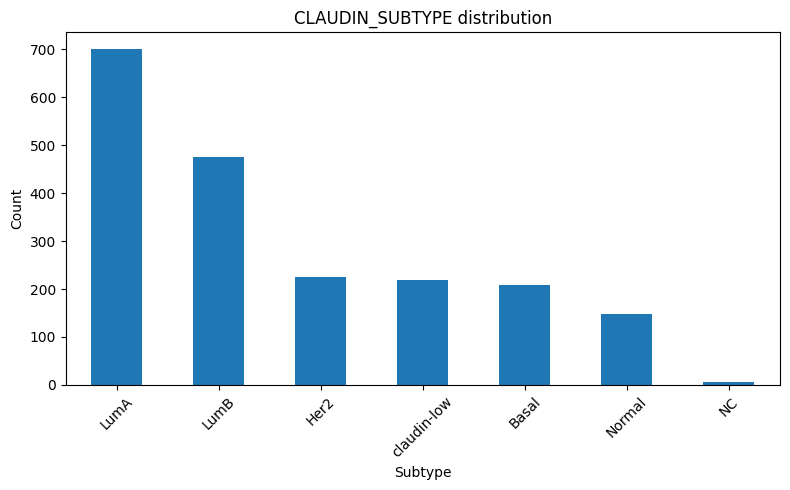

In [52]:
plt.figure(figsize=(8,5))
clinical_df_processed["CLAUDIN_SUBTYPE"].value_counts().plot(kind="bar")
plt.title("CLAUDIN_SUBTYPE distribution")
plt.xlabel("Subtype")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This is the target feature and it is a very inbalanced feature. NC should be dropped since there are very little samples from it.

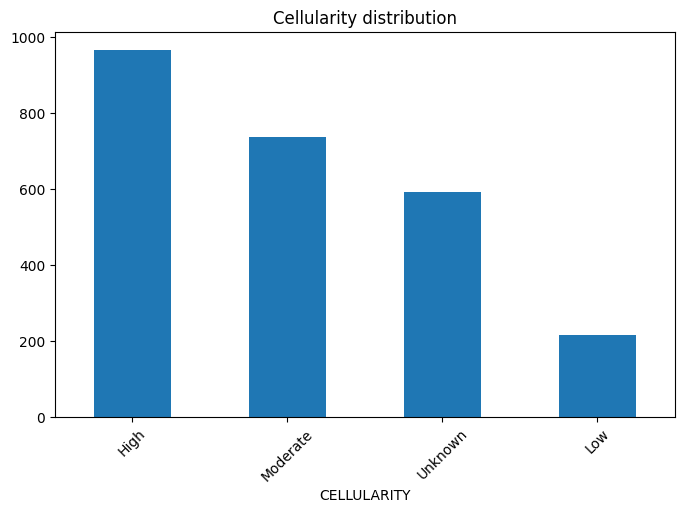

In [53]:
plt.figure(figsize=(8,5))
clinical_df_processed["CELLULARITY"].value_counts().plot(kind="bar")
plt.title("Cellularity distribution")
plt.xticks(rotation=45)
plt.show()

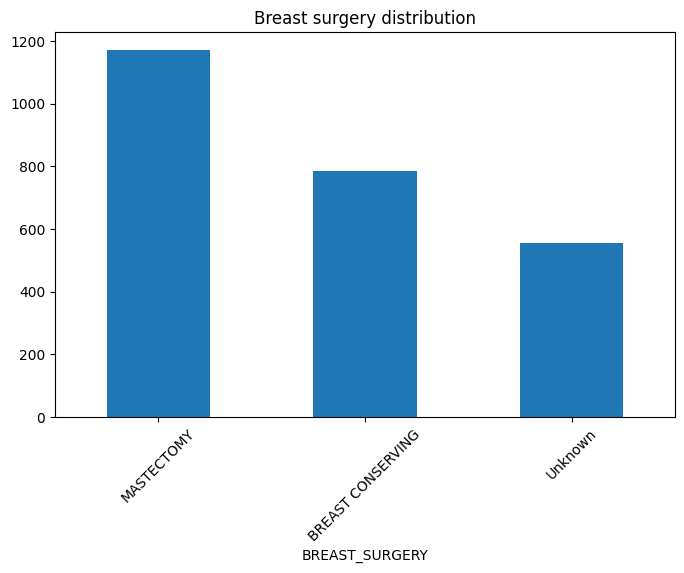

In [54]:
plt.figure(figsize=(8,5))
clinical_df_processed["BREAST_SURGERY"].value_counts().plot(kind="bar")
plt.title("Breast surgery distribution")
plt.xticks(rotation=45)
plt.show()

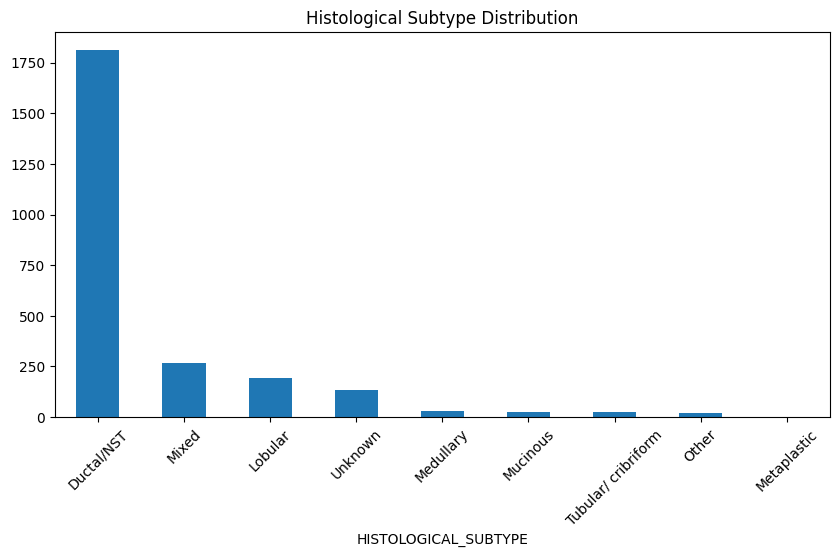

In [55]:
plt.figure(figsize=(10,5))
clinical_df_processed["HISTOLOGICAL_SUBTYPE"].value_counts().plot(kind="bar")
plt.title("Histological Subtype Distribution")
plt.xticks(rotation=45)
plt.show()

This is a very imbalanced feature, I should deal with it with caution.

In [56]:
import seaborn as sns
import numpy as np

In [57]:
df = clinical_df_processed.copy()

In [58]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

In [59]:
print("Numeric columns:")
print(numeric_df.columns)

Numeric columns:
Index(['LYMPH_NODES_EXAMINED_POSITIVE', 'NPI', 'COHORT', 'AGE_AT_DIAGNOSIS',
       'OS_MONTHS', 'RFS_MONTHS'],
      dtype='object')


In [60]:
corr_matrix =numeric_df.corr()

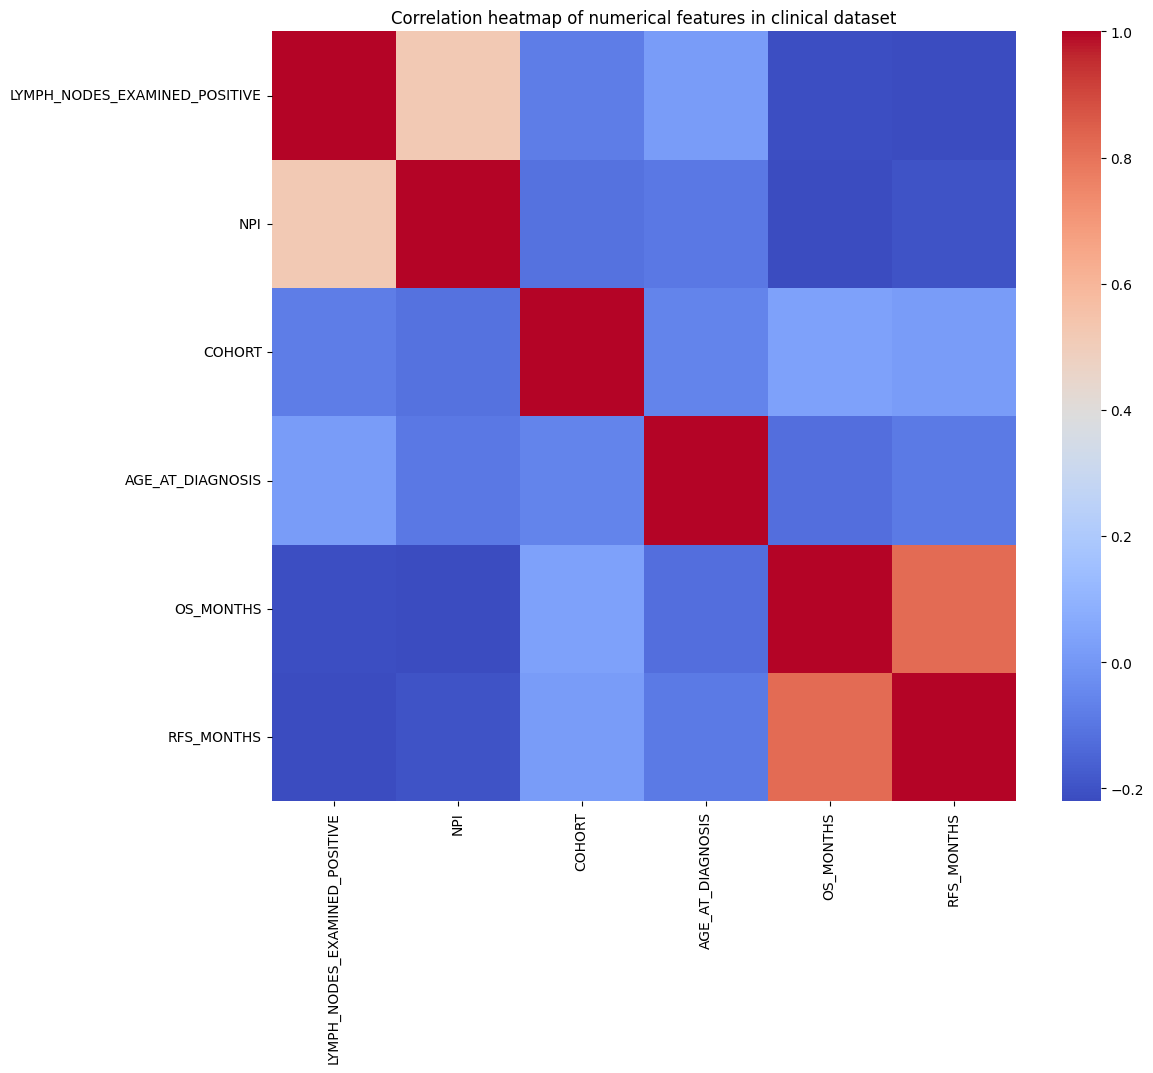

In [61]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation heatmap of numerical features in clinical dataset")
plt.show()

In [62]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["CLAUDIN_SUBTYPE_encoded"] = label_encoder.fit_transform(df["CLAUDIN_SUBTYPE"])
numeric_df["CLAUDIN_SUBTYPE_encoded"] = df["CLAUDIN_SUBTYPE_encoded"]
corr_with_target = numeric_df.corr()["CLAUDIN_SUBTYPE_encoded"].sort_values()
print(corr_with_target)

LYMPH_NODES_EXAMINED_POSITIVE   -0.076845
AGE_AT_DIAGNOSIS                -0.074840
OS_MONTHS                       -0.023598
NPI                             -0.017037
RFS_MONTHS                      -0.012973
COHORT                           0.160755
CLAUDIN_SUBTYPE_encoded          1.000000
Name: CLAUDIN_SUBTYPE_encoded, dtype: float64


We can see here that there is no strong correlation between the numerical features and the target feature.

## Changing the dataset to numerical values

In [63]:
merged_df['CELLULARITY'].unique()

array(['High', 'Moderate', 'Low', 'Unknown'], dtype=object)

In [64]:
merged_df['CELLULARITY'].value_counts()

CELLULARITY
High        962
Moderate    736
Low         213
Unknown      63
Name: count, dtype: int64

In [65]:
cell_map = {"Low":0, "Moderate":1,"High":2,"Unknown":0}
merged_df["CELLULARITY"] = merged_df["CELLULARITY"].map(cell_map)

In [66]:
print(merged_df['CHEMOTHERAPY'].unique())
print(merged_df['HORMONE_THERAPY'].unique())
print(merged_df['RADIO_THERAPY'].unique())

['YES' 'NO']
['YES' 'NO']
['YES' 'NO']


In [67]:
binary_map = {"NO": 0, "YES": 1}

merged_df["CHEMOTHERAPY"] = merged_df["CHEMOTHERAPY"].map(binary_map)
merged_df["HORMONE_THERAPY"] = merged_df["HORMONE_THERAPY"].map(binary_map)
merged_df["RADIO_THERAPY"] = merged_df['RADIO_THERAPY'].map(binary_map)

In [68]:
print(merged_df['CHEMOTHERAPY'].unique())
print(merged_df['HORMONE_THERAPY'].unique())
print(merged_df['RADIO_THERAPY'].unique())

[1 0]
[1 0]
[1 0]


In [69]:
merged_df["ER_IHC"].unique()

array(['Positve', 'Negative', 'Unknown'], dtype=object)

In [70]:
merged_df["ER_IHC"] = merged_df["ER_IHC"].replace("Positve", "Positive")

In [71]:
merged_df["ER_IHC"].unique()

array(['Positive', 'Negative', 'Unknown'], dtype=object)

In [72]:
merged_df["ER_IHC"] = merged_df["ER_IHC"].map({
    "Negative": 0,
    "Positive": 1,
    "Unknown": 0
})

In [73]:
merged_df["ER_IHC"].unique()

array([1, 0])

In [74]:
merged_df["HER2_SNP6"].unique()

array(['NEUTRAL', 'GAIN', 'LOSS', 'UNDEF'], dtype=object)

In [75]:
her2_map = {
    "LOSS":0,
    "NEUTRAL":1,
    "GAIN":2,
    "UNDEF":1
}

merged_df["HER2_SNP6"]=merged_df["HER2_SNP6"].map(her2_map)

In [76]:
merged_df["HER2_SNP6"].unique()

array([1, 2, 0])

In [77]:
merged_df["INFERRED_MENOPAUSAL_STATE"].unique()

array(['Post', 'Pre'], dtype=object)

In [78]:
merged_df = pd.get_dummies(merged_df, columns=["INFERRED_MENOPAUSAL_STATE"], drop_first=True)

In [79]:
merged_df["INFERRED_MENOPAUSAL_STATE_Pre"].unique()

array([False,  True])

In [80]:
merged_df["SEX"].unique()

array(['Female'], dtype=object)

In [81]:
merged_df = merged_df.drop("SEX", axis=1)

In [82]:
merged_df["INTCLUST"].unique()

array(['2', '5', '9', '7', '4ER+', '1', '10', '6', '3', '8', '4ER-'],
      dtype=object)

This is the integrative cluster - molecular classification of breast cancer. This comes from the genomic integrration of gene expressions, copy number variation and clinical data. So, the numerical clusters are from 1-10 -> molecular types. The special clusters are 4ER+ and 4ER-. 

I think that one hot encoding is the best option here because that way we don't add no sequence.

In [83]:
merged_df = pd.get_dummies(
    merged_df,
    columns=["INTCLUST"],
    drop_first=True
)

In [84]:
merged_df['OS_STATUS'].unique()

array(['1:DECEASED', '0:LIVING'], dtype=object)

In [85]:
os_map = {
    "1:DECEASED":1,
    "0:LIVING":0
}

merged_df["OS_STATUS"] = merged_df["OS_STATUS"].map(os_map)

In [86]:
merged_df["OS_STATUS"].unique()

array([1, 0])

In [87]:
merged_df["RFS_STATUS"].unique()

array(['1:Recurred', '0:Not Recurred', 'Unknown'], dtype=object)

In [88]:
merged_df = merged_df[merged_df['RFS_STATUS'] != "Unknown"]

In [89]:
rfs_map = {
    "1:Recurred":1,
    "0:Not Recurred":0
}

merged_df["RFS_STATUS"] = merged_df["RFS_STATUS"].map(rfs_map)

In [90]:
merged_df["RFS_STATUS"].unique()

array([1, 0])

In [91]:
merged_df["RFS_STATUS"].dtype

dtype('int64')

In [92]:
merged_df["BREAST_SURGERY"].unique()

array(['MASTECTOMY', 'BREAST CONSERVING', 'Unknown'], dtype=object)

In [93]:
merged_df = pd.get_dummies(
    merged_df,
    columns=["BREAST_SURGERY"],
    drop_first=True
)

In [94]:
merged_df["BREAST_SURGERY_MASTECTOMY"].unique()

array([ True, False])

In [95]:
merged_df["VITAL_STATUS"].unique()

array(['Died of Disease', 'Living', 'Died of Other Causes'], dtype=object)

In [96]:
merged_df = merged_df.drop("VITAL_STATUS", axis=1)

In [97]:
merged_df.head()

,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,...,INTCLUST_3,INTCLUST_4ER+,INTCLUST_4ER-,INTCLUST_5,INTCLUST_6,INTCLUST_7,INTCLUST_8,INTCLUST_9,BREAST_SURGERY_MASTECTOMY,BREAST_SURGERY_Unknown
0,8.676978,6.075331,5.838270,6.397503,7.906217,5.702379,6.930741,5.332863,5.275676,5.443896,...,False,False,False,False,False,False,False,False,True,False
1,9.653589,6.687887,5.600876,5.246319,8.267256,5.521794,6.141689,7.563477,5.376381,5.319857,...,False,False,False,True,False,False,False,False,True,False
2,9.033589,5.910885,6.030718,10.111816,7.959291,5.689533,6.529312,5.482155,5.463788,5.254294,...,False,False,False,False,False,False,False,True,False,False
3,8.814855,5.628740,5.849428,6.116868,9.206376,5.439130,6.430102,5.398675,5.409761,5.512298,...,False,False,False,False,False,False,False,False,False,False
4,8.736406,6.392422,5.542133,5.184098,8.162845,5.464326,6.105427,5.026018,5.338580,5.430874,...,False,False,False,False,False,False,False,True,True,False


This collumn is dropped because I think it would tell the models from the status what kind of tumor we are talking about.

In [98]:
merged_df['LATERALITY'].unique()

array(['Left', 'Right', 'Unknown'], dtype=object)

In [99]:
merged_df = pd.get_dummies(
    merged_df,
    columns=["LATERALITY"],
    drop_first=True
)

In [100]:
merged_df['HISTOLOGICAL_SUBTYPE'].unique()

array(['Ductal/NST', 'Lobular', 'Mixed', 'Mucinous', 'Unknown', 'Other',
       'Tubular/ cribriform', 'Medullary', 'Metaplastic'], dtype=object)

In [101]:
merged_df["CLAUDIN_SUBTYPE"].unique()

array(['LumA', 'Her2', 'LumB', 'claudin-low', 'Basal', 'Normal'],
      dtype=object)

In [102]:
merged_df = pd.get_dummies(
    merged_df,
    columns=["HISTOLOGICAL_SUBTYPE"],
    drop_first=True
)

In [103]:
merged_df["THREEGENE"].unique()

array(['ER+/HER2- High Prolif', 'HER2+', 'ER+/HER2- Low Prolif',
       'ER-/HER2-', 'Unknown'], dtype=object)

In [104]:
merged_df = merged_df.drop("THREEGENE", axis=1)

This column is dropped because of the same reason as above, data leakage.

Regarding "CLAUDIN_SUBTYPE", it should be encoded with label encoder, but I am going to do that after we split the dataset.

In [105]:
merged_df.head()

,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,...,LATERALITY_Right,LATERALITY_Unknown,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Metaplastic,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform,HISTOLOGICAL_SUBTYPE_Unknown
0,8.676978,6.075331,5.838270,6.397503,7.906217,5.702379,6.930741,5.332863,5.275676,5.443896,...,False,False,False,False,False,False,False,False,False,False
1,9.653589,6.687887,5.600876,5.246319,8.267256,5.521794,6.141689,7.563477,5.376381,5.319857,...,False,False,False,False,False,False,False,False,False,False
2,9.033589,5.910885,6.030718,10.111816,7.959291,5.689533,6.529312,5.482155,5.463788,5.254294,...,True,False,False,False,False,False,False,False,False,False
3,8.814855,5.628740,5.849428,6.116868,9.206376,5.439130,6.430102,5.398675,5.409761,5.512298,...,True,False,False,False,False,False,False,False,False,False
4,8.736406,6.392422,5.542133,5.184098,8.162845,5.464326,6.105427,5.026018,5.338580,5.430874,...,True,False,False,False,False,False,False,False,False,False


In [106]:
merged_df.columns

Index(['RERE', 'RNF165', 'PHF7', 'CIDEA', 'TENT2', 'SLC17A3', 'SDS',
       'ATP6V1C2', 'F3', 'FAM71C',
       ...
       'LATERALITY_Right', 'LATERALITY_Unknown',
       'HISTOLOGICAL_SUBTYPE_Lobular', 'HISTOLOGICAL_SUBTYPE_Medullary',
       'HISTOLOGICAL_SUBTYPE_Metaplastic', 'HISTOLOGICAL_SUBTYPE_Mixed',
       'HISTOLOGICAL_SUBTYPE_Mucinous', 'HISTOLOGICAL_SUBTYPE_Other',
       'HISTOLOGICAL_SUBTYPE_Tubular/ cribriform',
       'HISTOLOGICAL_SUBTYPE_Unknown'],
      dtype='object', length=20641)

In [107]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1973 entries, 0 to 1979
Columns: 20641 entries, RERE to HISTOLOGICAL_SUBTYPE_Unknown
dtypes: bool(23), float64(20609), int64(8), object(1)
memory usage: 310.4+ MB


In [108]:
merged_df = merged_df.to_csv("data.csv", index=False)

In [109]:
data_df = pd.read_csv("data.csv")

In [110]:
data_df.head()

,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,...,LATERALITY_Right,LATERALITY_Unknown,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Metaplastic,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform,HISTOLOGICAL_SUBTYPE_Unknown
0,8.676978,6.075331,5.838270,6.397503,7.906217,5.702379,6.930741,5.332863,5.275676,5.443896,...,False,False,False,False,False,False,False,False,False,False
1,9.653589,6.687887,5.600876,5.246319,8.267256,5.521794,6.141689,7.563477,5.376381,5.319857,...,False,False,False,False,False,False,False,False,False,False
2,9.033589,5.910885,6.030718,10.111816,7.959291,5.689533,6.529312,5.482155,5.463788,5.254294,...,True,False,False,False,False,False,False,False,False,False
3,8.814855,5.628740,5.849428,6.116868,9.206376,5.439130,6.430102,5.398675,5.409761,5.512298,...,True,False,False,False,False,False,False,False,False,False
4,8.736406,6.392422,5.542133,5.184098,8.162845,5.464326,6.105427,5.026018,5.338580,5.430874,...,True,False,False,False,False,False,False,False,False,False


In [111]:
data_df.sample(15)

,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,...,LATERALITY_Right,LATERALITY_Unknown,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Metaplastic,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform,HISTOLOGICAL_SUBTYPE_Unknown
1114,9.029570,6.001837,6.187098,6.182281,9.088321,5.645818,5.611066,5.227217,6.177527,5.324669,...,True,False,False,False,False,False,False,False,False,False
1810,9.969330,7.459473,5.323516,6.411176,7.998973,5.293971,6.341296,5.392437,5.961515,5.448366,...,True,False,False,False,False,False,False,False,False,False
1900,8.572880,5.973227,5.521680,6.724849,8.385571,5.623362,6.339176,5.257871,6.206189,5.349362,...,False,False,False,False,False,False,False,False,False,False
1490,9.744106,6.278901,6.041473,5.612660,8.307517,5.631726,6.741674,5.375232,5.553977,5.520963,...,True,False,False,False,False,False,False,False,False,False
1310,9.143370,5.850193,5.585870,5.560918,8.182984,5.493202,5.592908,5.729062,5.871070,5.412384,...,True,False,False,False,False,False,False,False,False,False
1226,8.635852,7.641001,6.065769,6.004419,8.348807,5.483114,5.864725,5.451360,5.737660,5.508090,...,False,True,True,False,False,False,False,False,False,False
1348,9.477680,6.170714,6.337077,5.290918,7.706659,5.597617,6.655234,5.341877,5.872014,5.406738,...,True,False,False,False,False,False,False,False,False,False
263,8.225633,6.002026,6.014584,5.296055,7.605340,5.898658,6.374076,5.678701,6.015427,5.333103,...,True,False,False,True,False,False,False,False,False,False
0,8.676978,6.075331,5.838270,6.397503,7.906217,5.702379,6.930741,5.332863,5.275676,5.443896,...,False,False,False,False,False,False,False,False,False,False
1785,8.158380,5.393307,5.809686,6.167034,8.545107,5.734994,6.727768,5.350993,6.389398,5.411044,...,False,False,False,False,False,False,False,False,False,False


In [112]:
data_df.isnull().values.any()

np.False_

In [113]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Columns: 20641 entries, RERE to HISTOLOGICAL_SUBTYPE_Unknown
dtypes: bool(23), float64(20609), int64(8), object(1)
memory usage: 310.4+ MB


Now, to sum up all the work done in this notebook. 
1. I first loaded the two datasets and checked for null missing values. The missing values were  imputed in the clinical_df and in the gene_df which had very little missing values.

2. Since the goal of this project is to predict subtypes of breast cancer, both clinical and gene data are needed and important, so that's why these two datasets are merged.

3. I next did a brief EDA to see the distributions of the categorical variables and if there is any correlation between the numerical features and our target feature.

4. The last preprocessing step in this notebook was the encoding of the features. All the features are encoded acordingly, some were dropped so they don't lead to data leakege. I've also made sure that there are no missing values in this last preprocessed dataset.

Now there are a few thing that need to be done to this final dataset for this notebook, one of them including scaling. But I will deal with these things in the other notebooks for every model because every model will want the dataset preprocessed in a specific way.

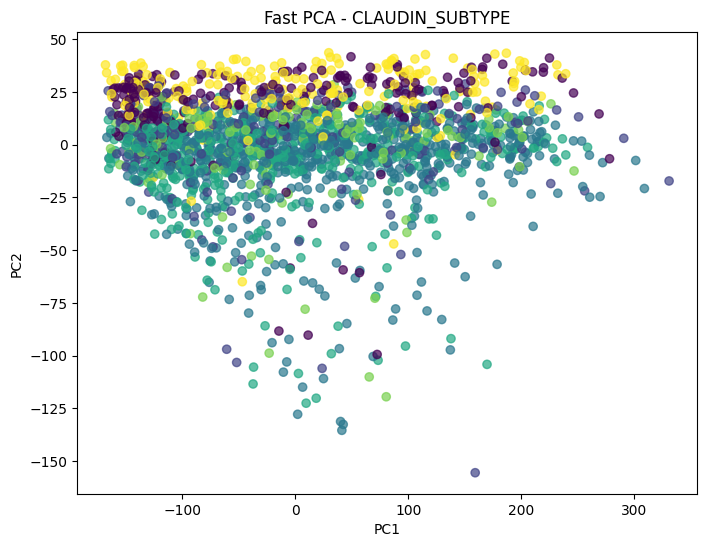

In [163]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

le = LabelEncoder()
y = le.fit_transform(data_df["CLAUDIN_SUBTYPE"])

X = data_df.select_dtypes(include=["float64","float32"])

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Fast PCA - CLAUDIN_SUBTYPE")
plt.show()

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

clinical_cols = [c for c in data_df.columns if 
                 any(c.startswith(p) for p in 
                     ['LATERALITY', 'HISTOLOGICAL', 'CLAUDIN', 'ER_', 'PR_', 
                      'HER2', 'GRADE', 'AGE', 'STAGE', 'OS_', 'DFS_', 'VITAL'])]

gene_cols = [c for c in data_df.columns if c not in clinical_cols]

print(f"Genes: {len(gene_cols)} | Clinical: {len(clinical_cols)}")
print(f"CLAUDIN_SUBTYPE classes: {data_df['CLAUDIN_SUBTYPE'].value_counts()}")

Genes: 20624 | Clinical: 18
CLAUDIN_SUBTYPE classes: CLAUDIN_SUBTYPE
LumA           699
LumB           475
Her2           224
claudin-low    218
Basal          209
Normal         148
Name: count, dtype: int64


c:\Users\marij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


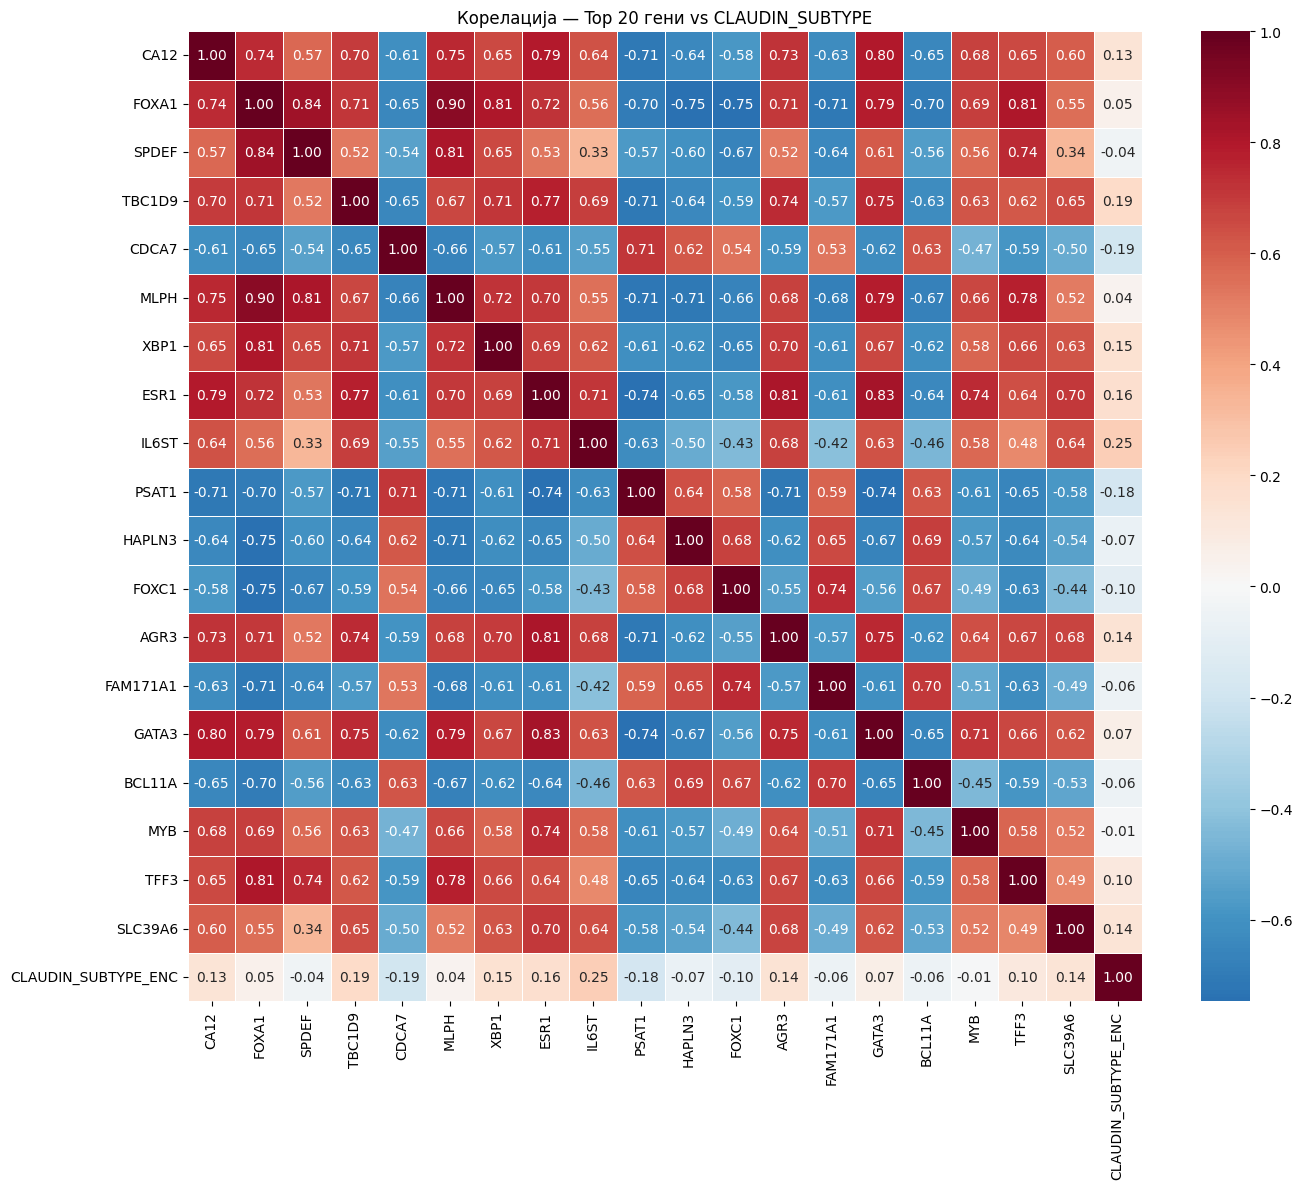

In [173]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

le = LabelEncoder()
y = le.fit_transform(data_df['CLAUDIN_SUBTYPE'].dropna())
X = data_df.select_dtypes(include=[np.number]).loc[data_df['CLAUDIN_SUBTYPE'].notna()]

selector = SelectKBest(f_classif, k=20)
selector.fit(X, y)
top20_genes = X.columns[selector.get_support()].tolist()

corr_df = X[top20_genes].copy()
corr_df['CLAUDIN_SUBTYPE_ENC'] = y
corr_matrix = corr_df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='RdBu_r', center=0, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Корелација — Top 20 гени vs CLAUDIN_SUBTYPE')
plt.tight_layout()
plt.show()

Here, i briefly saw which genes (top 20 that came up with SelectKBest) are most correlated with CLAUDIN_SUBTYPE. More of the analysis and explanation why these genes are here will be documented in a pdf file.